# US Housing Trends Analyzer and Influence Explorer

#### Build a data science models that explains how these factors impacted home prices over the last 20 years.

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#### Reading prepared (US home prices) data into a dataframe.

In [2]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.rename(columns={'CS_Index_Value':'CSUSHPISA'},inplace=True)
us_house_price_df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,Unemployment_Rate,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
DATE,,,,,,,,,,,,,,,,
2003-01-01,128.461,2003,1,50462.000000,185656300.0,4.0,182.6,5.8,62.5,144.4,1.24,79.6,111278,68350,25.93,12.1
2003-02-01,129.356,2003,2,50573.333333,185830200.0,4.5,183.6,5.9,62.5,145.2,1.26,79.6,111278,68350,25.93,12.1
2003-03-01,130.148,2003,3,50684.666667,186120800.0,4.1,183.9,5.9,62.4,145.2,1.25,79.6,111278,68350,25.93,12.1
2003-04-01,130.884,2003,4,50796.000000,186475100.0,4.1,183.2,6.0,62.4,145.9,1.26,79.6,111278,68350,25.93,12.1
2003-05-01,131.735,2003,5,51034.666667,186696400.0,3.9,182.9,6.1,62.3,145.8,1.26,79.6,111278,68350,25.93,12.1


In [3]:
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

### Exploratory Data Analysis (EDA)

#### Summary Statistics:
Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [4]:
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,Unemployment_Rate,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
count,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,186.603397,57905.567460,2.005367e+08,6.223810,233.580091,5.898413,60.179365,218.514925,1.478889,81.371429,121824.904762,71972.380952,35.577238,14.033333
std,48.312931,4494.866130,6.264982e+06,1.947986,31.195954,2.050789,1.901680,50.357530,1.734616,1.127339,6342.512099,5031.851604,7.114063,1.694331
min,128.461000,50462.000000,1.856563e+08,3.300000,182.600000,3.400000,51.200000,144.400000,0.050000,79.600000,111278.000000,65740.000000,25.930000,12.100000
25%,148.375250,54508.000000,1.964030e+08,4.875000,212.414750,4.400000,58.700000,187.050000,0.120000,80.400000,116783.000000,68250.000000,29.876000,12.500000
50%,174.610500,56212.333333,2.022996e+08,5.600000,232.918500,5.350000,60.100000,209.200000,0.715000,81.300000,122459.000000,70080.000000,33.806000,13.700000
75%,204.501500,61359.833333,2.057290e+08,7.425000,252.276750,7.200000,62.125000,233.925000,2.280000,82.300000,127586.000000,75790.000000,38.859000,15.300000
max,315.075000,67858.000000,2.082624e+08,12.200000,308.735000,14.800000,63.400000,353.015000,5.330000,83.300000,131434.000000,81210.000000,53.573000,17.400000


#### Correlation Analysis:
Calculate the correlation matrix to measure the linear relationships between variables.

In [5]:
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,Unemployment_Rate,EmpRate,Cons_Material,FEDFUNDS,urban_pop_us,Num_Households,median_income,Subsidy,old_age_pop
CSUSHPISA,1.000000,0.923651,0.609382,0.206459,0.857875,-0.544792,-0.089667,0.917621,0.354498,0.800255,0.752050,0.856242,0.882075,0.859275
Per_Capita_GDP,0.923651,1.000000,0.830708,0.093717,0.953908,-0.517354,-0.277792,0.933880,0.144671,0.947372,0.927306,0.882616,0.938042,0.964529
working_age_pop,0.609382,0.830708,1.000000,0.117856,0.901981,-0.171380,-0.610148,0.778839,-0.203019,0.938311,0.962677,0.636107,0.836011,0.871487
Houses,0.206459,0.093717,0.117856,1.000000,0.174747,0.011239,0.126459,0.238741,0.284453,0.049149,0.039082,0.020762,0.151786,0.016175
CPI,0.857875,0.953908,0.901981,0.174747,1.000000,-0.311779,-0.465422,0.958241,0.000662,0.970952,0.958121,0.767956,0.974264,0.968248
Unemployment_Rate,-0.544792,-0.517354,-0.171380,0.011239,-0.311779,1.000000,-0.610907,-0.350799,-0.554851,-0.300470,-0.302209,-0.541531,-0.265272,-0.360185
EmpRate,-0.089667,-0.277792,-0.610148,0.126459,-0.465422,-0.610907,1.000000,-0.356080,0.682276,-0.527015,-0.535441,-0.121424,-0.464851,-0.456112
Cons_Material,0.917621,0.933880,0.778839,0.238741,0.958241,-0.350799,-0.356080,1.000000,0.061085,0.897915,0.868858,0.738570,0.946820,0.918870
FEDFUNDS,0.354498,0.144671,-0.203019,0.284453,0.000662,-0.554851,0.682276,0.061085,1.000000,-0.106919,-0.135629,0.249799,0.025909,-0.043102
urban_pop_us,0.800255,0.947372,0.938311,0.049149,0.970952,-0.300470,-0.527015,0.897915,-0.106919,1.000000,0.992952,0.814520,0.950305,0.985918


Visualize the correlation matrix using a heatmap to identify strong positive and negative correlations.

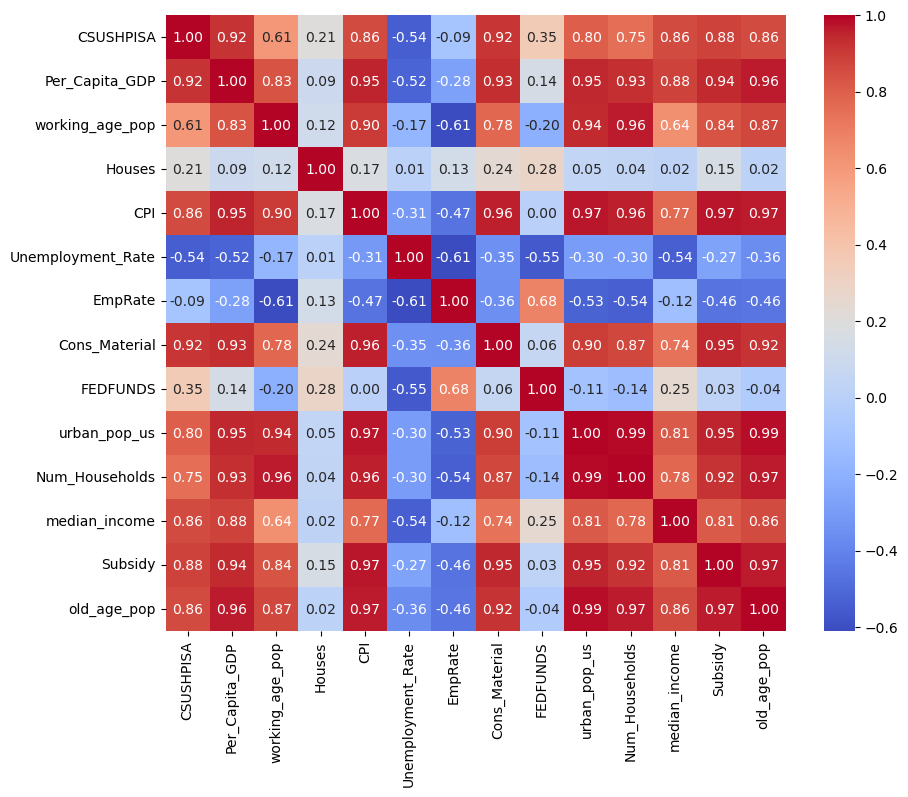

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### Time Series Analysis:
For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over time.

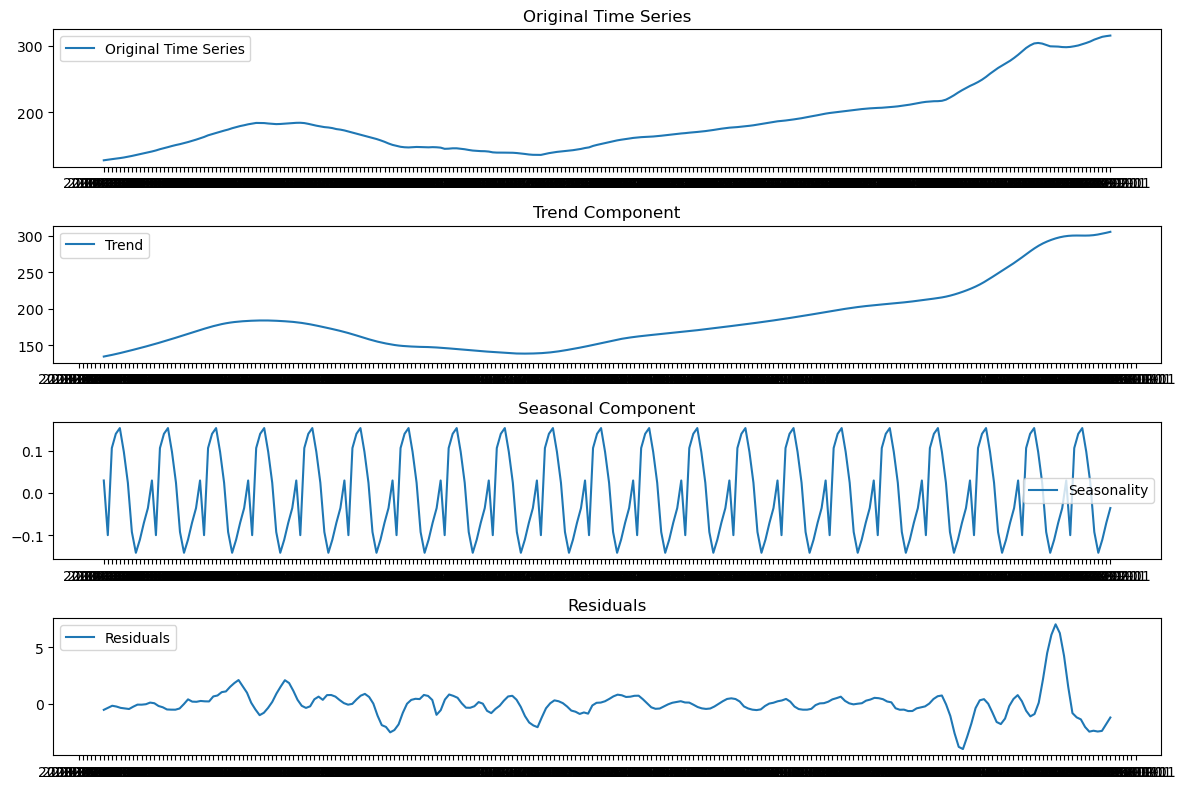

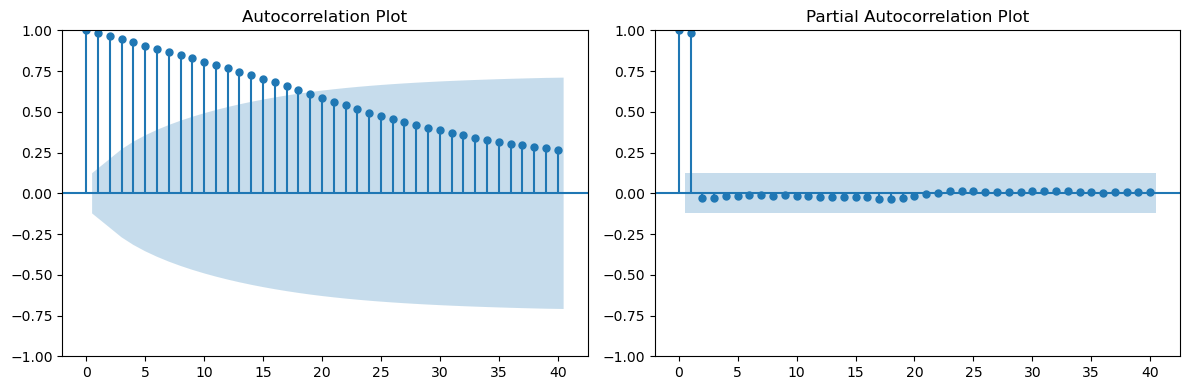

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

#### Data Visualization:
Visualize the data using various plots and graphs to understand its distribution and trends.

##### Pairplot for visualizing relationships

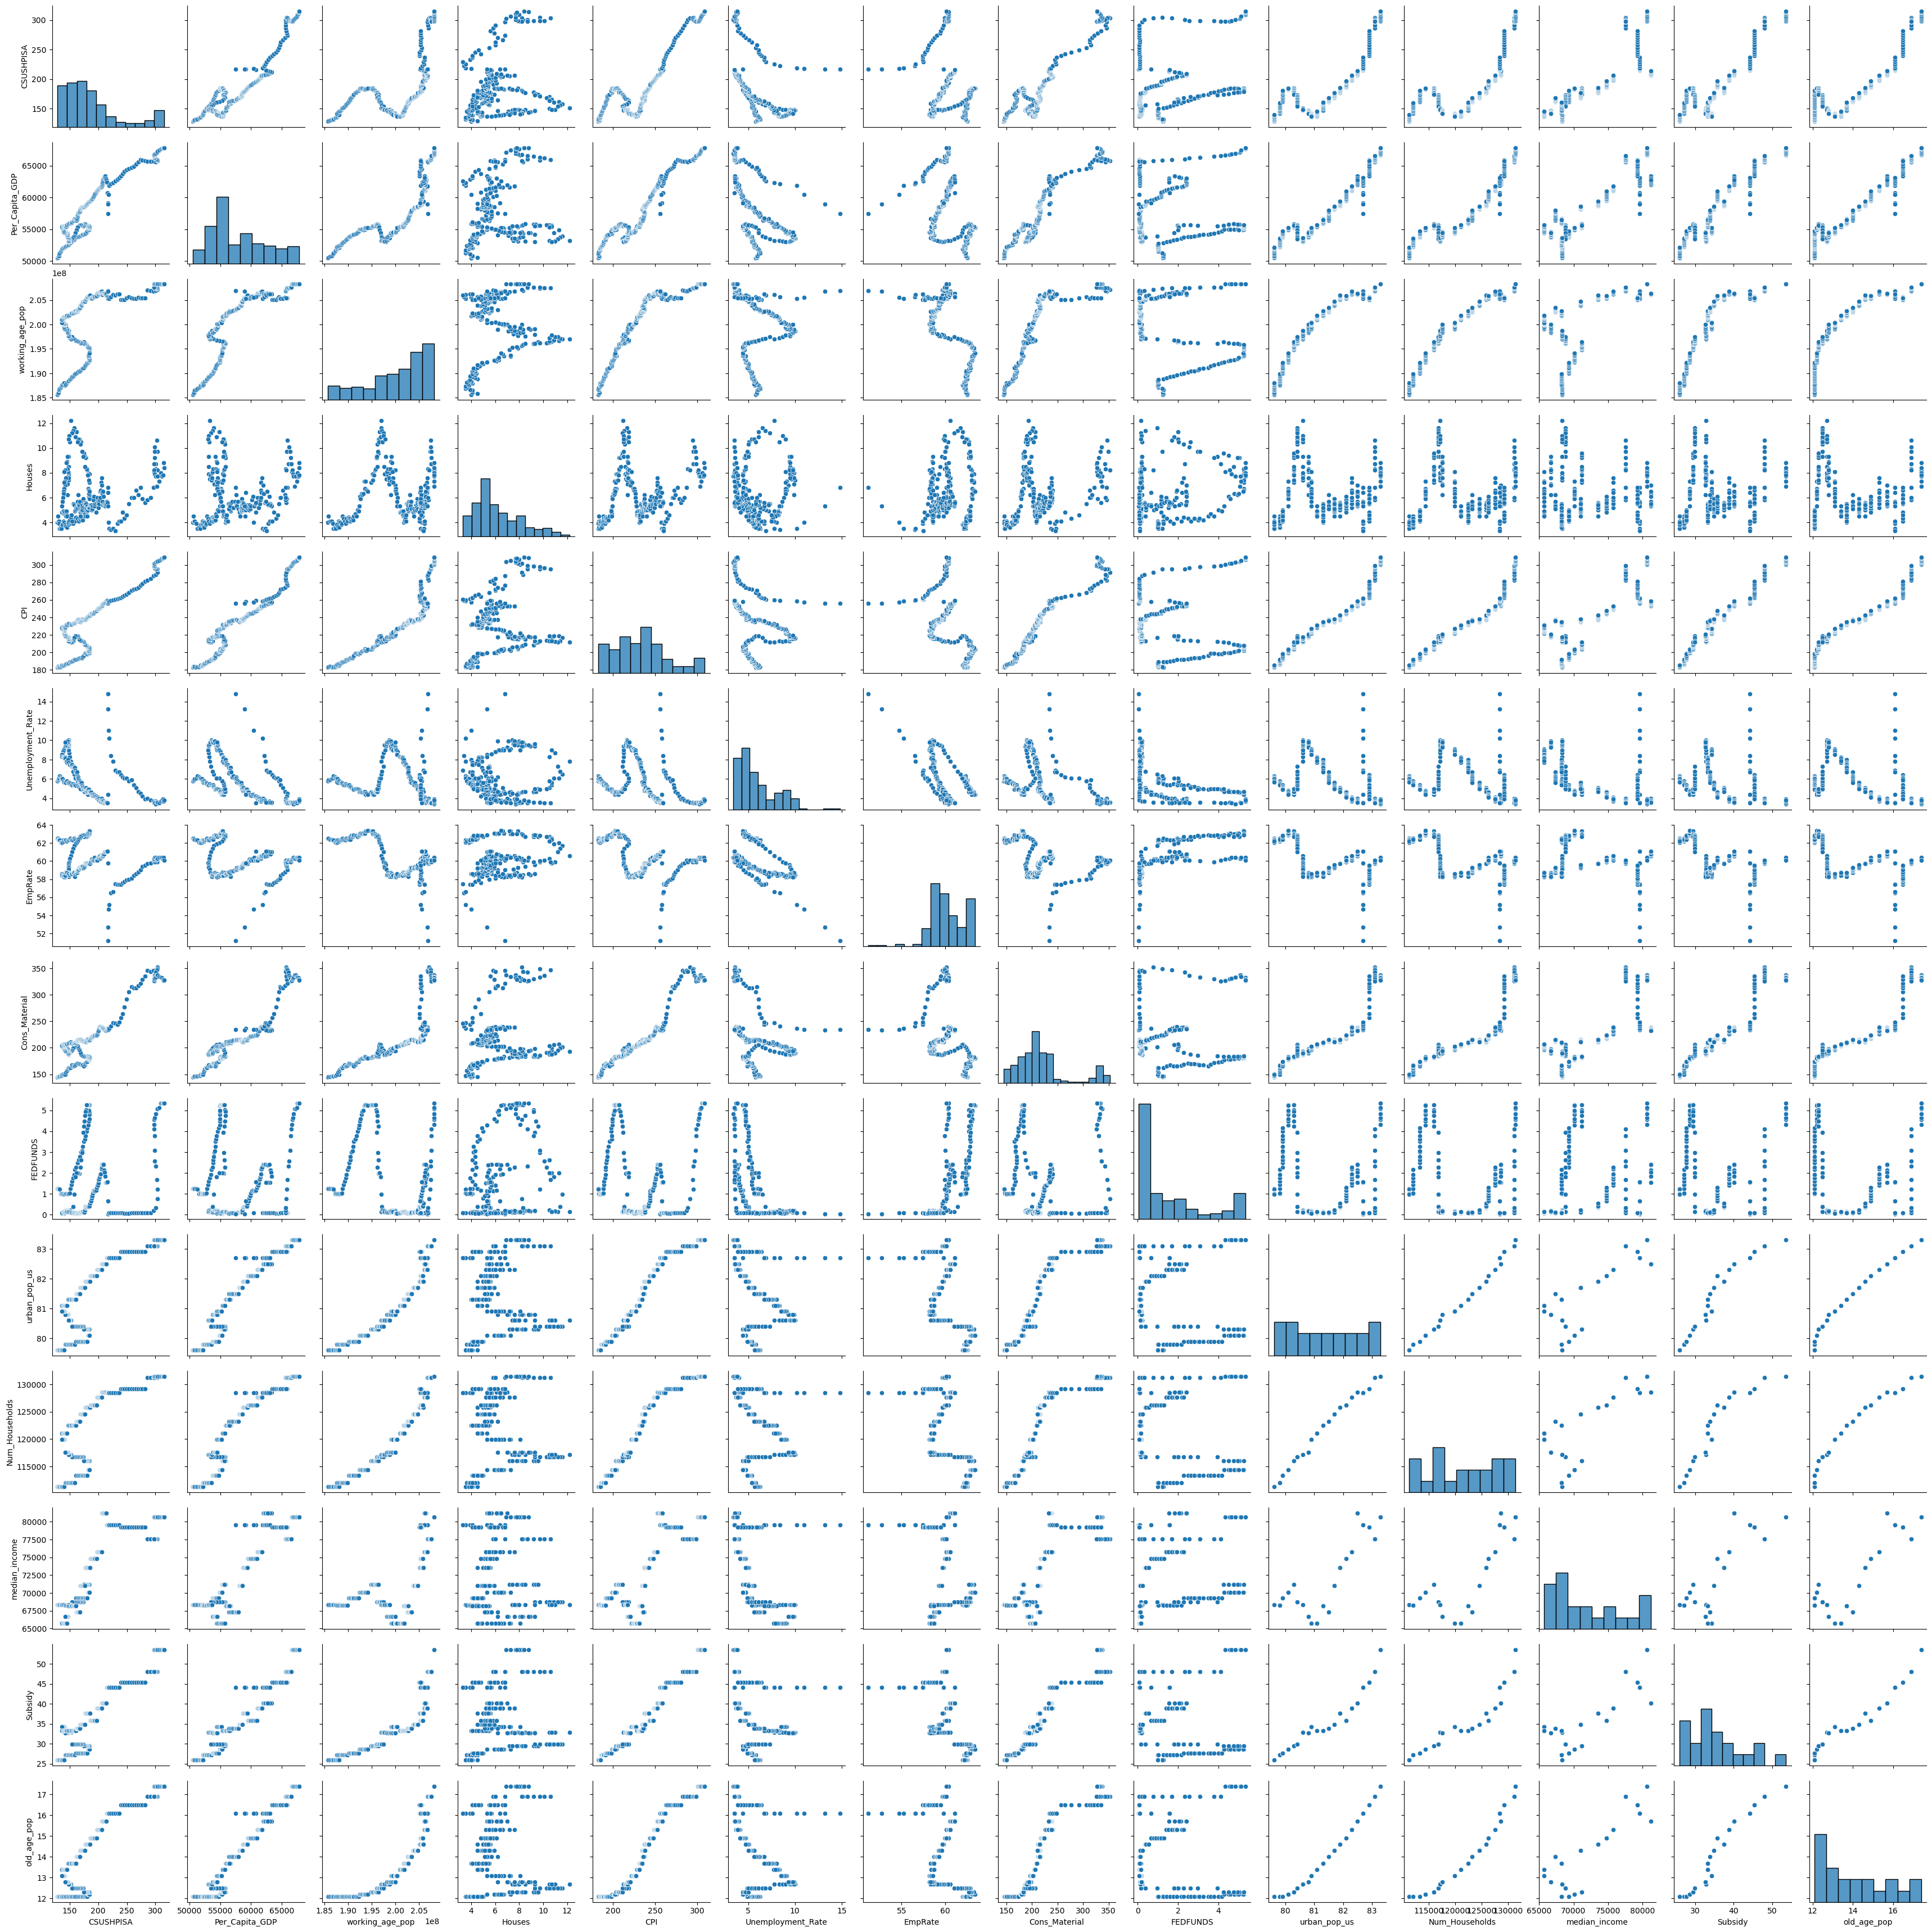

In [9]:
sns.pairplot(us_house_price_df)

In [10]:
us_house_price_df.columns

Index(['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop', 'Houses', 'CPI',
       'Unemployment_Rate', 'EmpRate', 'Cons_Material', 'FEDFUNDS',
       'urban_pop_us', 'Num_Households', 'median_income', 'Subsidy',
       'old_age_pop'],
      dtype='object')

In [11]:
factors = ['CSUSHPISA', 'Unemployment_Rate', 'Per_Capita_GDP', 'FEDFUNDS', 'Cons_Material', 'CPI', 'Houses', 'Num_Households', 'old_age_pop', 'urban_pop_us', 'Subsidy', 'working_age_pop', 'median_income']

##### Histograms and Kernel Density Plots

<Figure size 1300x800 with 0 Axes>

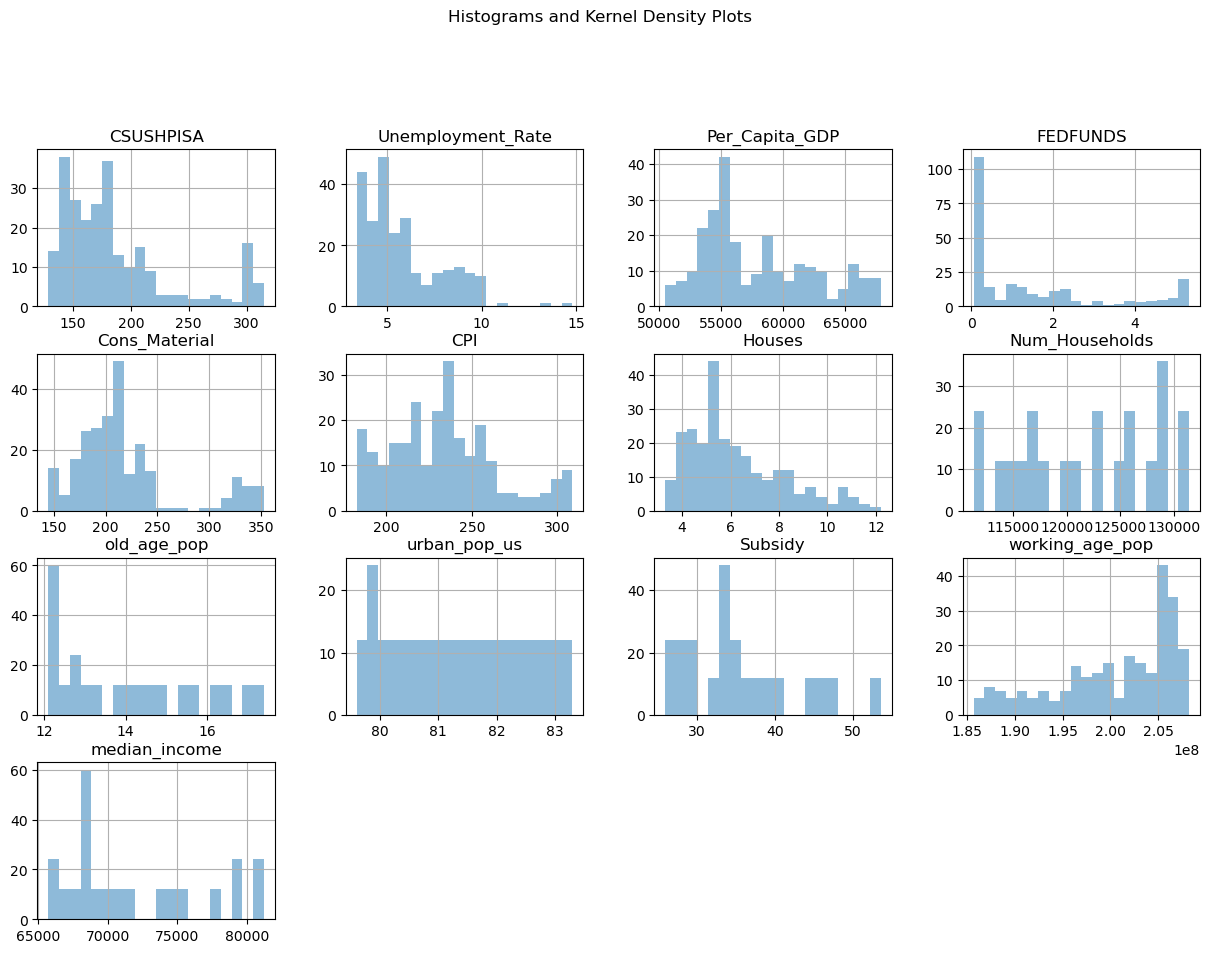

In [12]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

##### Violin Plots:

Generates violin plots to visualize the distribution and density of each factor.

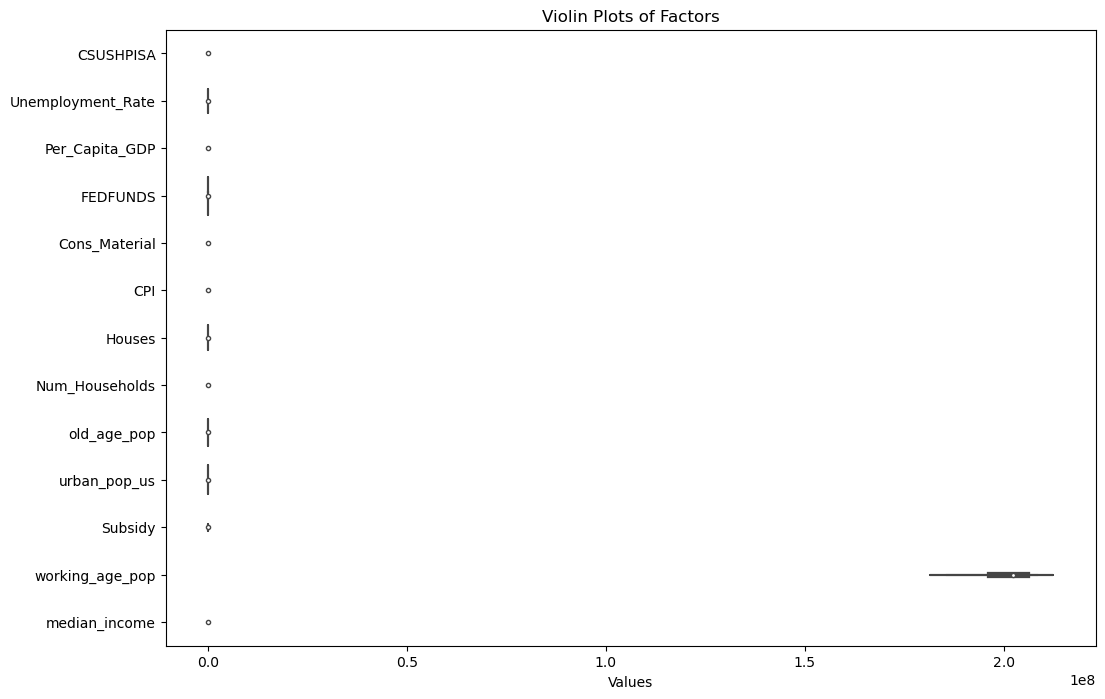

In [13]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

#### Extract features and target

In [14]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

##### Plotting scatter plots of the CASE-SHILLER index vs features

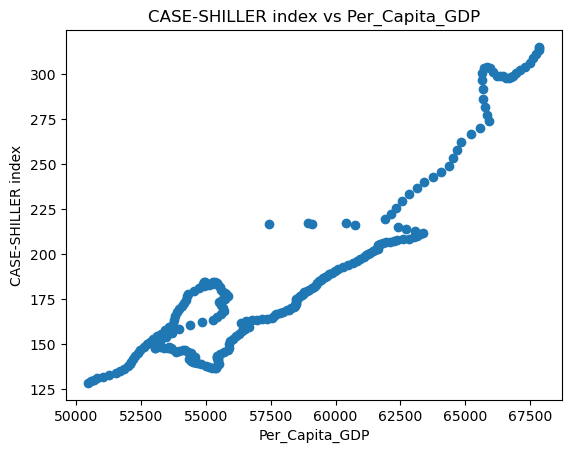

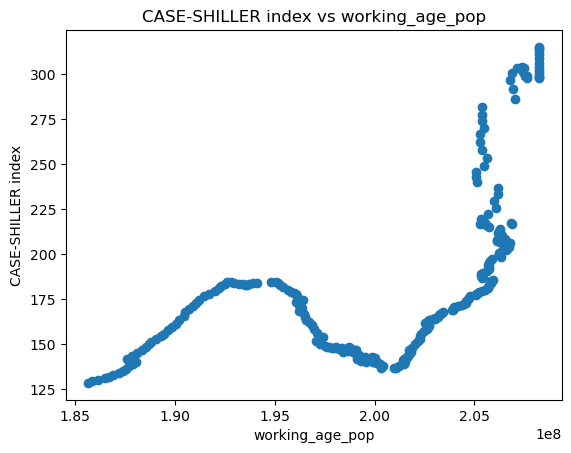

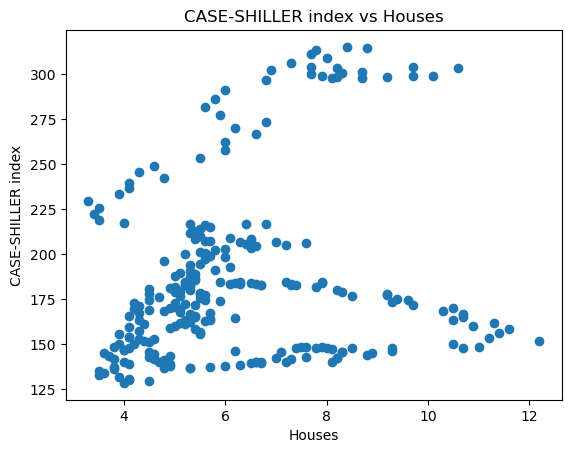

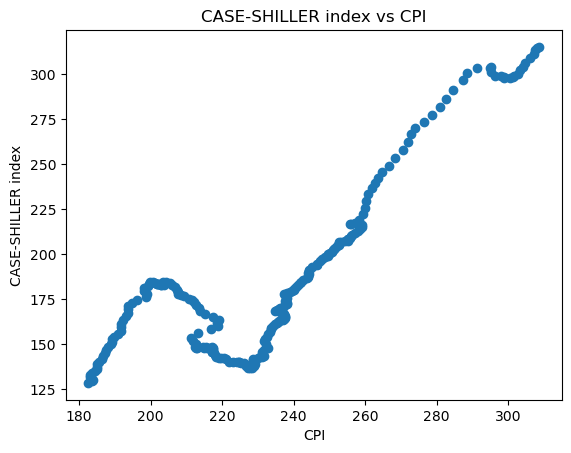

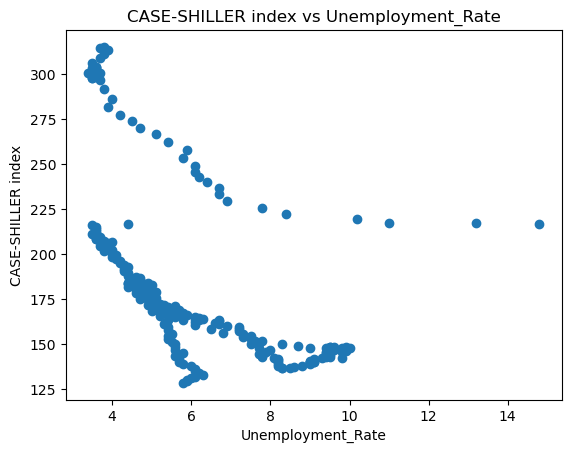

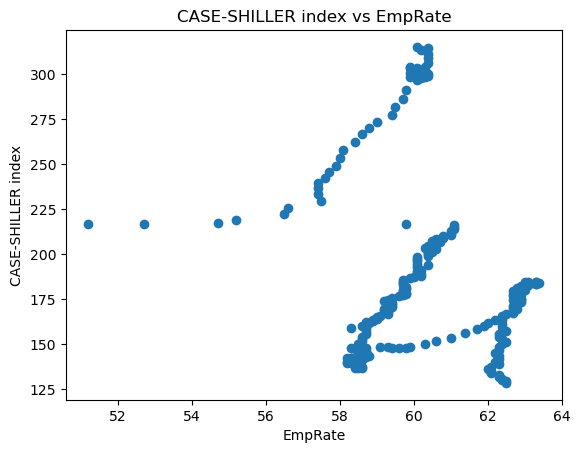

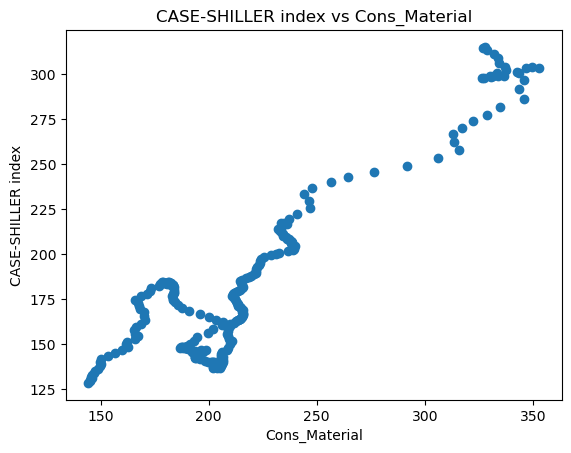

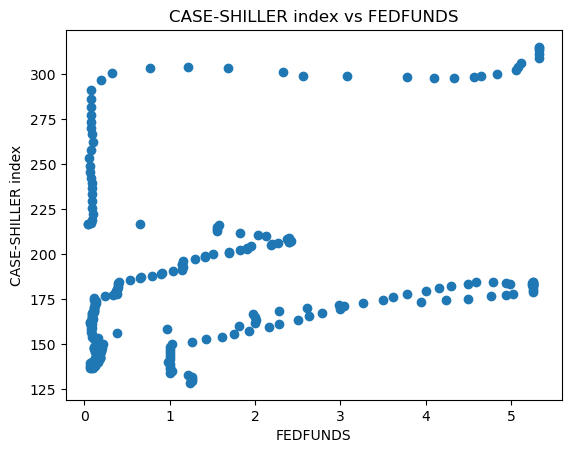

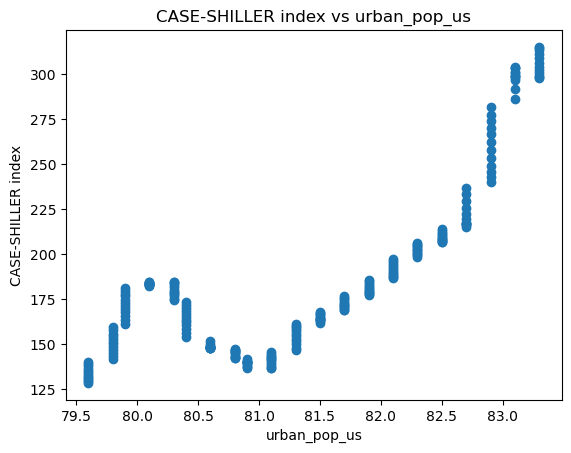

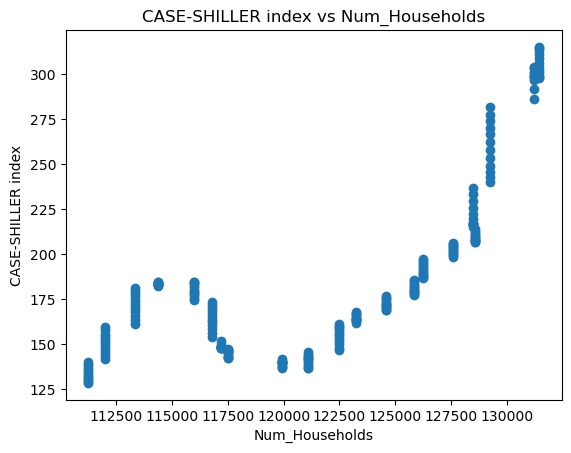

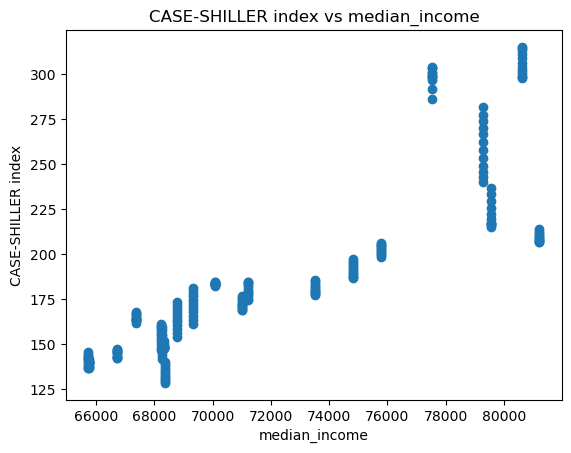

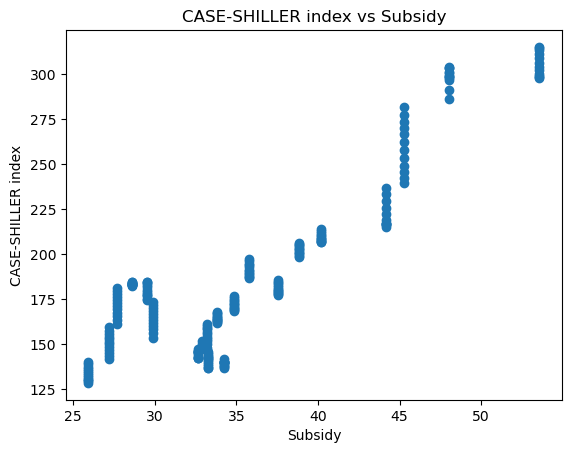

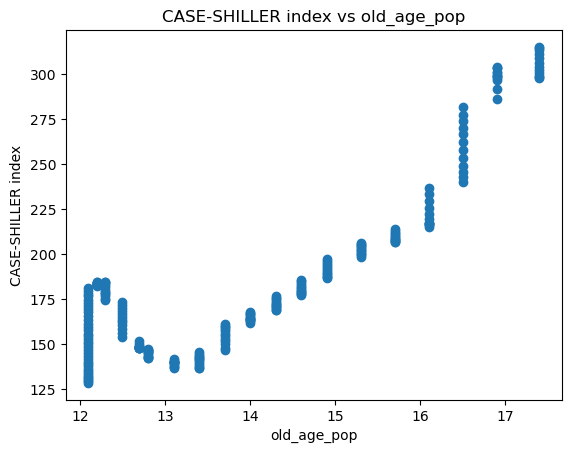

In [15]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

#### Calculate correlation coefficients

In [16]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
EmpRate              0.089667
Houses               0.206459
FEDFUNDS             0.354498
Unemployment_Rate    0.544792
working_age_pop      0.609382
Num_Households       0.752050
urban_pop_us         0.800255
median_income        0.856242
CPI                  0.857875
old_age_pop          0.859275
Subsidy              0.882075
Cons_Material        0.917621
Per_Capita_GDP       0.923651
dtype: float64


Based on the provided correlation coefficients:

##### Highest Correlation:

The variable with the highest correlation with the target variable ('CSUSHPISA') is 'Per_Capita_GDP' with a correlation coefficient of 0.923651. This feature shows a strong positive linear relationship with home prices.

##### Other Strong Correlations:

'Cons_Material' (0.917621), 'Subsidy' (0.882075), 'old_age_pop' (0.859275), 'median_income' (0.856242), and 'CPI' (0.857875) also have strong positive correlations.

##### Moderate Correlations:

'urban_pop_us' (0.800255), 'Num_Households' (0.752050), and 'working_age_pop' (0.609382) have moderate positive correlations.

###### Lower Correlations:

'Unemployment_Rate' (0.544792), 'EmpRate' (0.089667), 'Houses' (0.206459), and 'FEDFUNDS' (0.354498) have lower correlations.

#### Data science models

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

In [19]:
mult_cols = ["working_age_pop", "Houses", "urban_pop_us", "Num_Households", "Unemployment_Rate", "EmpRate", "FEDFUNDS"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [20]:
X

,Per_Capita_GDP,CPI,Cons_Material,median_income,Subsidy,old_age_pop
DATE,,,,,,
2003-01-01,50462.000000,182.600,144.400,68350,25.930,12.1
2003-02-01,50573.333333,183.600,145.200,68350,25.930,12.1
2003-03-01,50684.666667,183.900,145.200,68350,25.930,12.1
2003-04-01,50796.000000,183.200,145.900,68350,25.930,12.1
2003-05-01,51034.666667,182.900,145.800,68350,25.930,12.1
...,...,...,...,...,...,...
2023-08-01,67618.666667,306.138,333.794,80610,53.573,17.4
2023-09-01,67738.333333,307.374,332.098,80610,53.573,17.4
2023-10-01,67858.000000,307.653,328.743,80610,53.573,17.4


#### Models building

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.

In [23]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 76.18084164109442
R-squared: 0.9511993972426457
Coefficients:
Per_Capita_GDP: 28.476823589330923
CPI: -25.60219479232764
Cons_Material: 42.93740914213474
median_income: 20.218577766724565
Subsidy: 20.36397954584363
old_age_pop: -36.0846965805951
Intercept: 188.5425820895523

Model: ElasticNet
Mean Squared Error: 253.54299569500844
R-squared: 0.8375831672598997
Coefficients:
Per_Capita_GDP: 9.038259995311003
CPI: 4.489351894763532
Cons_Material: 11.097510364511336
median_income: 9.769892165668518
Subsidy: 6.21201816281434
old_age_pop: 3.3130464442536782
Intercept: 188.54258208955224

Model: Random Forest
Mean Squared Error: 13.431555228161002
R-squared: 0.99139589459787
Feature Importance Analysis:
Per_Capita_GDP: 0.041924137387733235
CPI: 0.49619613892974046
Cons_Material: 0.25875045871918706
median_income: 0.1482333141214612
Subsidy: 0.04169211486058167
old_age_pop: 0.013203835981296513

Model: Gradient Boosting
Mean Squared Error: 9.617757

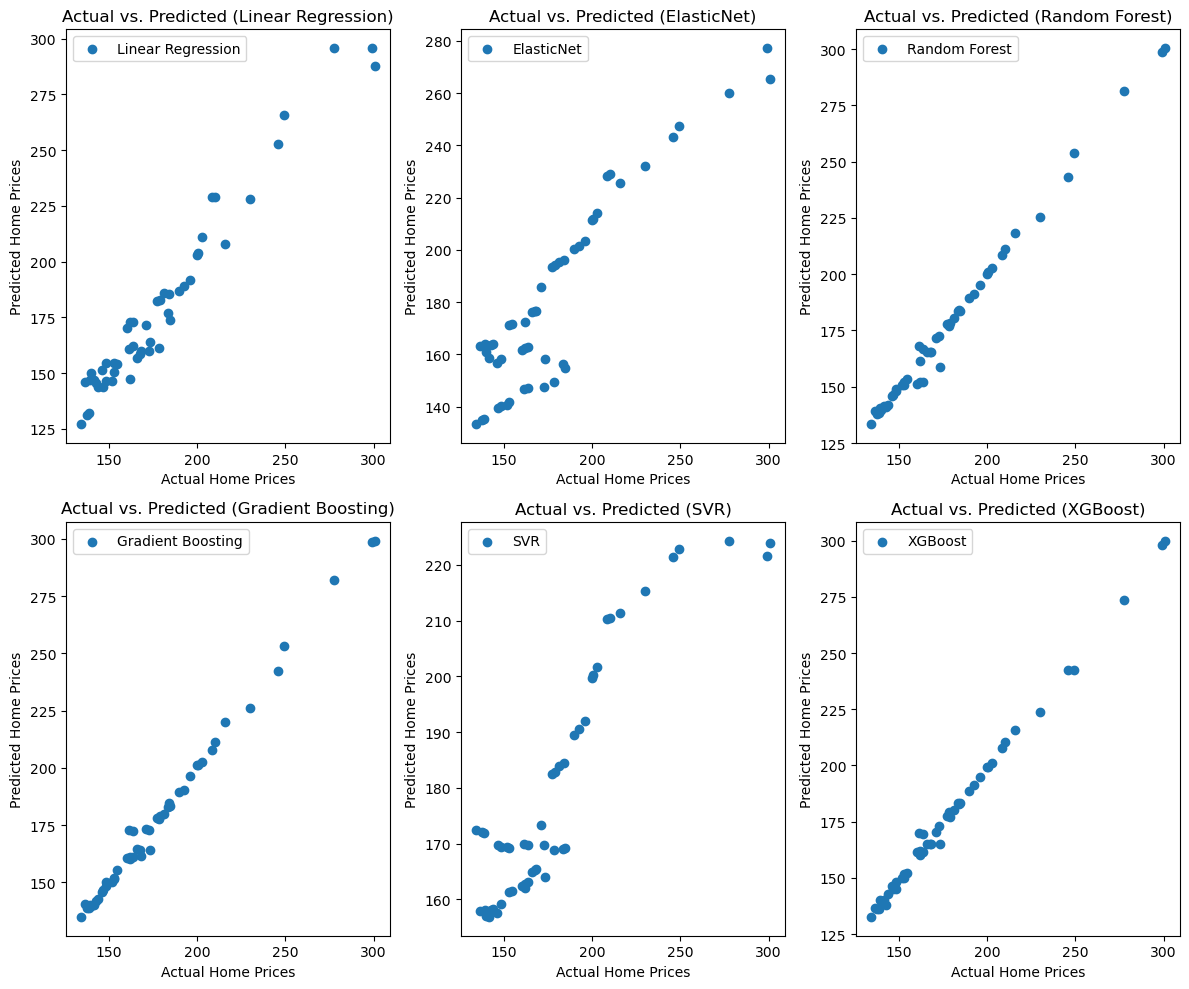


Best Model: XGBRegressor with MSE: 7.378071835080556


In [24]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")
    
    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

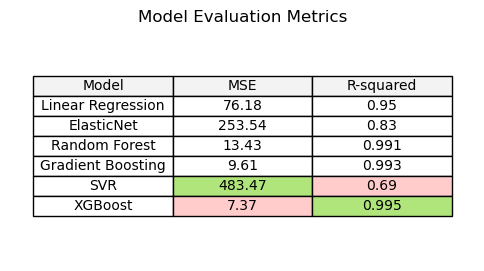

In [26]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [76.18, 253.54, 13.43, 9.61, 483.47, 7.37],
    'R-squared': [0.95, 0.83, 0.991, 0.993, 0.69, 0.995]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()